In [ ]:
### Week 4 Assignment 
## Programmer's name: Savannah Gourley
## Updating Los Angeles County data containing info on educational level and Service Planning Areas 
## will be pulled and ran through several commands to conduct census data exploration in order to 
## produce bar charts and maps.

In [ ]:
# importing pandas

In [1]:
import pandas as pd

In [ ]:
# loading dataset describing education level in LA county

In [11]:
df = pd.read_csv('High_School_Graduate_or_Higher_(census_tract).csv')

In [ ]:
# Peaking at dataset rows and columns

In [13]:
df.shape

(2495, 9)

In [14]:
df.head()

,OBJECTID,tract,name,hs_grad,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,1,6037101110,1011.10,90.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112
1,2,6037101122,1011.22,83.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265
2,3,6037980004,9800.04,NaN,District 5,City of Palmdale,SPA 1 - Antelope Valley,0.267915,0.003525
3,4,6037101220,1012.20,75.1,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068
4,5,6037101221,1012.21,76.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035


In [15]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      2495 non-null   int64  
 1   tract         2495 non-null   int64  
 2   name          2495 non-null   float64
 3   hs_grad       2476 non-null   float64
 4   sup_dist      2495 non-null   object 
 5   csa           2495 non-null   object 
 6   spa           2495 non-null   object 
 7   SHAPE_Length  2495 non-null   float64
 8   SHAPE_Area    2495 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 175.6+ KB


In [ ]:
### there appears to be no missing data

In [ ]:
### Need to put leading zeros for the tract number (AKA FIPS)

In [16]:
df = pd.read_csv(
    'High_School_Graduate_or_Higher_(census_tract).csv',
    dtype=
    {
        'tract':str
    }
)

In [17]:
df.head()

,OBJECTID,tract,name,hs_grad,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,1,06037101110,1011.10,90.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112
1,2,06037101122,1011.22,83.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265
2,3,06037980004,9800.04,NaN,District 5,City of Palmdale,SPA 1 - Antelope Valley,0.267915,0.003525
3,4,06037101220,1012.20,75.1,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068
4,5,06037101221,1012.21,76.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035


In [ ]:
# We got leading zeros! Yay!

In [ ]:
# No need to rename columns; column names already make sense

In [ ]:
# Create bar chart for the top ten SPAs that have the lowest proportions of people
# who graduated with a high school degree or higher

In [18]:
df_sorted = df.sort_values(by='hs_grad',ascending = True)

In [24]:
df_sorted[['spa','hs_grad']].head(10)

,spa,hs_grad
638,SPA 4 - Metro,30.9
1780,SPA 6 - South,32.4
627,SPA 4 - Metro,33.3
628,SPA 4 - Metro,33.5
780,SPA 6 - South,33.8
784,SPA 6 - South,34.2
1705,SPA 7 - East,34.6
794,SPA 6 - South,35.1
630,SPA 4 - Metro,37.1
1784,SPA 6 - South,37.3


<Axes: title={'center': '10 Lowest LA SPAs with High School or Higher Completion Rate in 2023'}, xlabel='spa'>

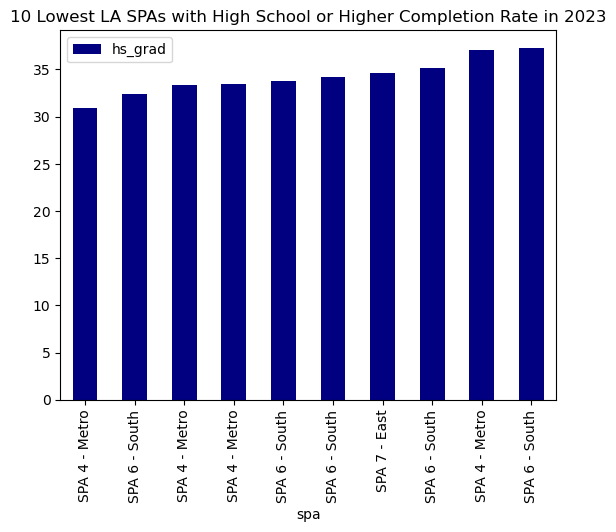

In [28]:
df_sorted.head(10).plot.bar(x='spa',
                            y='hs_grad',
                           title= '10 Lowest LA SPAs with High School or Higher Completion Rate in 2023',
                            color='navy')

In [ ]:
# It appears that SPAs 4 and 6 have the lowest education level

In [ ]:
# Now let's chart the areas of LA that have the highest amount of people who have 
# obtained a high school degree or higher

In [29]:
df_high = df.sort_values(by='hs_grad',ascending = False)

In [ ]:
#Only going to look at top 10 areas since dataset is large

In [30]:
df_high[['spa','hs_grad']].head(10)

,spa,hs_grad
944,SPA 5 - West,100.0
954,SPA 5 - West,100.0
2486,SPA 2 - San Fernando,100.0
2484,SPA 5 - West,100.0
957,SPA 5 - West,100.0
956,SPA 5 - West,100.0
2296,SPA 2 - San Fernando,100.0
2479,SPA 8 - South Bay,100.0
2477,SPA 7 - East,100.0
2473,SPA 2 - San Fernando,100.0


<Axes: title={'center': '10 Highest LA SPAs with High School or Higher Completion Rate in 2023'}, xlabel='spa'>

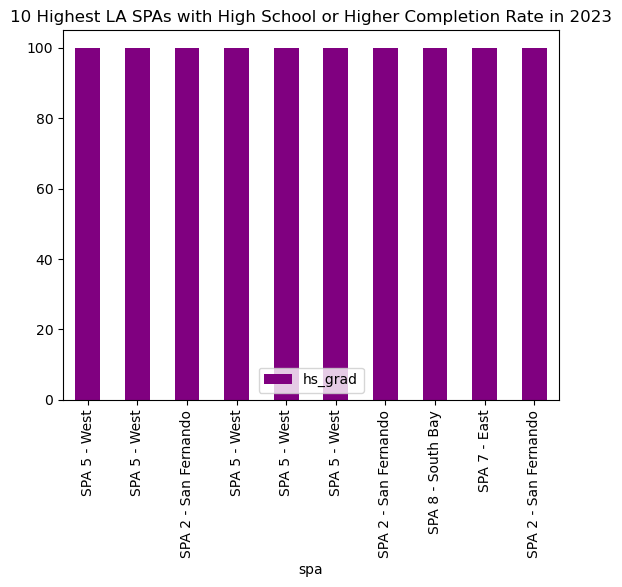

In [33]:
df_high.head(10).plot.bar(x='spa',
                            y='hs_grad',
                           title= '10 Highest LA SPAs with High School or Higher Completion Rate in 2023',
                            color='purple')

In [ ]:
# It appears that SPA 5 dominates with education which makes sense given it's an 
# area with high SES.

In [ ]:
# map time! Importing geopandas

In [37]:
import geopandas as gpd

In [ ]:
# importing dataset from LA Times

In [42]:
map=gpd.read_file('Census_Tracts_2020.geojson')
map.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [43]:
# Only really need FIPS and geometry, so let's subset the data
map = map[['CT20','geometry']]
map.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [44]:
# create a tract column
map['tract'] ='06' + '037' + map['CT20']

In [45]:
# check it!
map.head()

,CT20,geometry,tract
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [ ]:
# Going to merge both datasets on tract (AKA FIPS)

In [47]:
# creating a new dataframe based on the join
df_2=map.merge(df,on="tract")

In [ ]:
# checking it

In [48]:
df_2.head()

,CT20,geometry,tract,OBJECTID,name,hs_grad,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1,1011.10,90.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,2,1011.22,83.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,4,1012.20,75.1,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,5,1012.21,76.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,7,1012.22,82.4,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028


In [ ]:
#Let's put the merged dataset on a map

<Axes: >

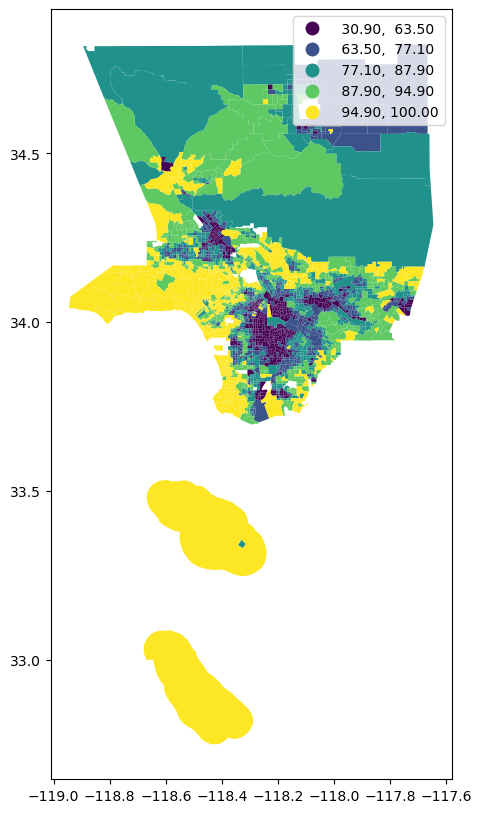

In [49]:
df_2.plot(figsize=(12,10),
                 column='hs_grad',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
# This map shows that residents in the metro city area of LA have the lowest proportion of 
# people who obtained a high school degree or higher

In [ ]:
###Now let's add a new level of education
#Reading in Bachelors Degree or Higher dataset from LA GeoHub

In [2]:
wk4 = pd.read_csv("Bachelors_Degree_or_Higher_(census_tract).csv")

In [ ]:
#Let's check how many rows and columns it has

In [3]:
wk4.shape

(2495, 9)

In [ ]:
#Has the same amount of rows and columns as the HS Degree dataset

In [4]:
wk4.head()

,OBJECTID,tract,name,bachelors,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,1,6037101110,1011.10,27.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,14765.649004,1.232981e+07
1,2,6037101122,1011.22,38.2,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,30028.213771,2.908866e+07
2,3,6037980004,9800.04,NaN,District 5,City of Palmdale,SPA 1 - Antelope Valley,88089.895702,3.858493e+08
3,4,6037101220,1012.20,25.6,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,12504.552130,7.532651e+06
4,5,6037101221,1012.21,24.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,8938.421349,3.874399e+06


In [10]:
wk4.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      2495 non-null   int64  
 1   tract         2495 non-null   object 
 2   name          2495 non-null   float64
 3   bachelors     2476 non-null   float64
 4   sup_dist      2495 non-null   object 
 5   csa           2495 non-null   object 
 6   spa           2495 non-null   object 
 7   SHAPE_Length  2495 non-null   float64
 8   SHAPE_Area    2495 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 175.6+ KB


In [ ]:
#Appears to have no missing data

In [ ]:
#Let's put those leading zeros on the tract number

In [5]:
wk4 = pd.read_csv(
    "Bachelors_Degree_or_Higher_(census_tract).csv",
    dtype=
    {
        'tract':str
    }
)

In [6]:
wk4.head()

,OBJECTID,tract,name,bachelors,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,1,06037101110,1011.10,27.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,14765.649004,1.232981e+07
1,2,06037101122,1011.22,38.2,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,30028.213771,2.908866e+07
2,3,06037980004,9800.04,NaN,District 5,City of Palmdale,SPA 1 - Antelope Valley,88089.895702,3.858493e+08
3,4,06037101220,1012.20,25.6,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,12504.552130,7.532651e+06
4,5,06037101221,1012.21,24.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,8938.421349,3.874399e+06


In [ ]:
#Leading zeros added!

In [7]:
wk4_sorted = wk4.sort_values(by='bachelors',ascending = True)

In [9]:
wk4_sorted[['csa','bachelors']].head(10)

,csa,bachelors
2491,City of Santa Fe Springs,0.0
2490,City of Long Beach,0.0
2473,Los Angeles - Van Nuys,0.0
2479,Los Angeles - Wilmington,0.0
2477,City of Downey,0.0
2476,City of Long Beach,0.0
1810,City of Compton,1.0
912,Los Angeles - Watts,1.1
1705,City of Huntington Park,1.6
1741,City of Cudahy,1.8


In [ ]:
#These are the neighborhoods that have the lowest proprotion of residents who have a Bachelor degree or higher
#Appears that some neighborhoods in LA county have 0.

In [12]:
wk4_sorted[['spa','bachelors']].head(10)

,spa,bachelors
2491,SPA 7 - East,0.0
2490,SPA 8 - South Bay,0.0
2473,SPA 2 - San Fernando,0.0
2479,SPA 8 - South Bay,0.0
2477,SPA 7 - East,0.0
2476,SPA 8 - South Bay,0.0
1810,SPA 6 - South,1.0
912,SPA 6 - South,1.1
1705,SPA 7 - East,1.6
1741,SPA 7 - East,1.8


In [ ]:
#Easier way to visualize which SPAs have the lowest proportions of residents who have a Bachlors degree or higher

<Axes: title={'center': '10 Lowest LA SPAs with Bachelors Degree or Higher Completion Rate in 2023'}, xlabel='spa'>

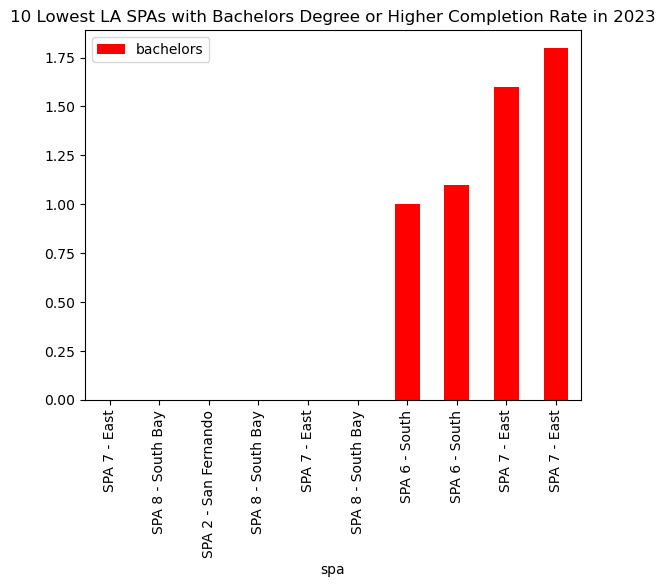

In [13]:
wk4_sorted.head(10).plot.bar(x='spa',
                            y='bachelors',
                           title= '10 LA SPAs with the Lowest Proportions of Bachelors Degree or Higher Completion Rate in 2023',
                            color='red')

In [ ]:
#Might be interesting to focus in on some of these SPAs for the main group project

In [14]:
import geopandas as gpd

In [ ]:
#reading in LA Times Census data 

In [16]:
edu=gpd.read_file('Census_Tracts_2020.geojson')
edu.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [17]:
edu = edu[['CT20','geometry']]
edu.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [ ]:
#Making a FIPS number from the LA Times Census data

In [18]:
edu['tract'] ='06' + '037' + edu['CT20']

In [ ]:
#check it

In [19]:
edu.head()

,CT20,geometry,tract
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [ ]:
#Now merging the LA Times and Bachelors Degree or Higher data on tract

In [20]:
wk4_v2=edu.merge(wk4,on="tract")

In [21]:
wk4_v2.head()

,CT20,geometry,tract,OBJECTID,name,bachelors,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1,1011.10,27.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,14765.649004,1.232981e+07
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,2,1011.22,38.2,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,30028.213771,2.908866e+07
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,4,1012.20,25.6,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,12504.552130,7.532651e+06
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,5,1012.21,24.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,8938.421349,3.874399e+06
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,7,1012.22,18.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,9750.960420,3.090538e+06


In [ ]:
#Plot time!

<Axes: >

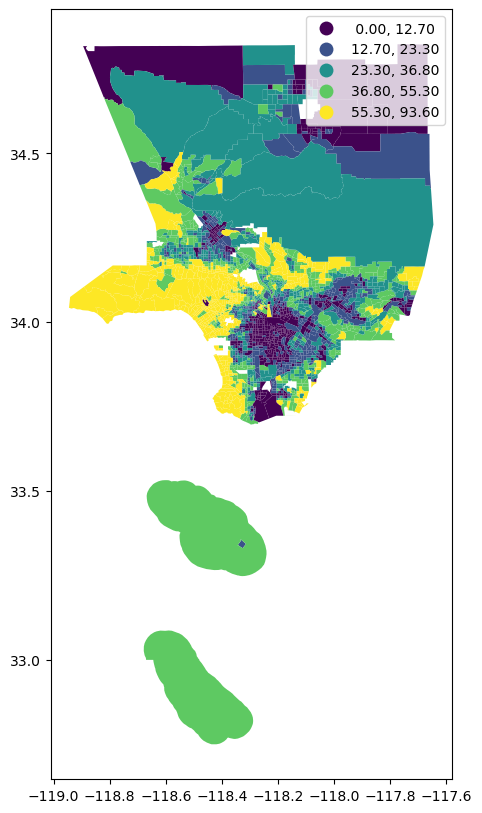

In [23]:
wk4_v2.plot(figsize=(12,10),
                 column='bachelors',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
#Areas with yellow have higher proportions of residents who have Bachelor degrees or higher degrees
#Areas with purple appear to have low proportions of residents who have Bachelor degrees or higher degrees

In [ ]:
#For more visualization, let's add a scatterplot

<Axes: xlabel='Proportion of Bachelor Degree or Higher', ylabel='LA County SPAs'>

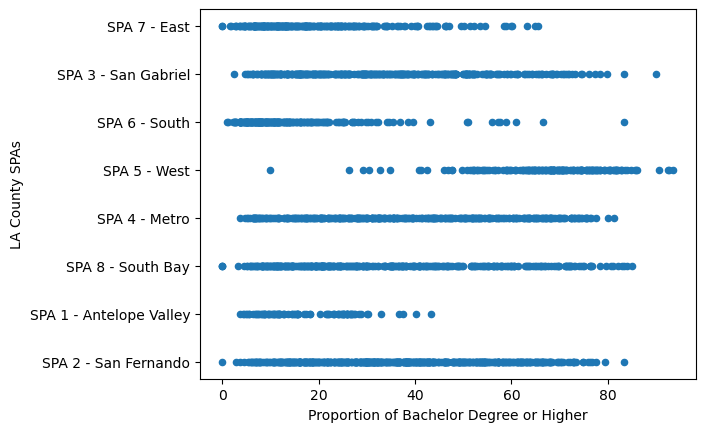

In [7]:
wk4.plot.scatter(x='bachelors', y= 'spa',
                xlabel= 'Proportion of Bachelor Degree or Higher',
                ylabel= 'LA County SPAs'
                )

In [ ]:
# I want the spas to be from 1 to 8 so let's sort

In [13]:
spa_sorted = wk4.sort_values(by='spa', ascending=False)

In [ ]:
#check it

In [14]:
spa_sorted.head()

,OBJECTID,tract,name,bachelors,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
2494,2495,6037980037,9800.37,NaN,District 2,City of Carson,SPA 8 - South Bay,14866.138291,1.376446e+07
2031,2032,6037575801,5758.01,13.0,District 4,City of Long Beach,SPA 8 - South Bay,8610.169178,4.667833e+06
2057,2058,6037577300,5773.00,52.5,District 4,City of Long Beach,SPA 8 - South Bay,12674.194794,8.753222e+06
2058,2059,6037577400,5774.00,59.8,District 4,City of Long Beach,SPA 8 - South Bay,11769.675273,6.943340e+06
2059,2060,6037577501,5775.01,57.6,District 4,City of Long Beach,SPA 8 - South Bay,15299.809964,1.457916e+07


<Axes: xlabel='Proportion of Bachelor Degree or Higher', ylabel='LA County SPAs'>

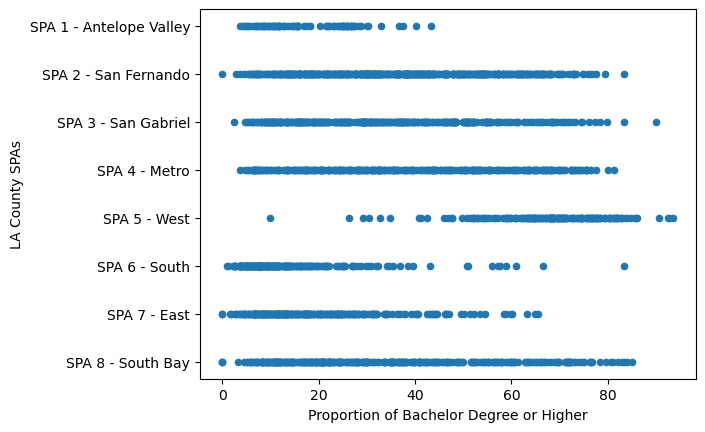

In [15]:
 spa_sorted.plot.scatter(x='bachelors', y= 'spa',
                xlabel= 'Proportion of Bachelor Degree or Higher',
                ylabel= 'LA County SPAs'
                )

In [ ]:
# That looks better. Now it reads from SPA 1 to SPA 8 for better visualization.
#SPA 5 definitely has the highest education levels in the LA county

In [ ]:
###END of ASSIGNMENT 4###